In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #импортируем библиотеки 

%matplotlib inline

In [3]:
user_data = pd.read_csv('/home/jupyter-n-demidov-20/MINIPROJECTS/3_user_data.csv')

In [4]:
logs = pd.read_csv('/home/jupyter-n-demidov-20/MINIPROJECTS/3_logs.csv')

In [5]:
user_data.head()
#  посмотрим на все данные, размер, типы переменных, опис.статистику

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [6]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [7]:
user_data.shape

(2954, 3)

In [8]:
logs.shape

(4500, 4)

In [9]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [10]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [11]:
user_data.nunique()

client     2954
premium       2
age          50
dtype: int64

In [12]:
logs.nunique()

client      4011
success        2
platform       3
time        4376
dtype: int64

In [13]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [14]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [15]:
user_data.isna().sum() # проверим, нет ли пропущенных значений в датасете

client     0
premium    0
age        0
dtype: int64

In [16]:
logs.isna().sum() # проверим, нет ли пропущенных значений в датасете

client      0
success     0
platform    0
time        0
dtype: int64

In [17]:
success_number = logs.query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'success': 'count'}) \
    .sort_values(['success', 'client'], ascending=[False, True]) \
    .rename(columns={'success': 'success_number'})
# посмотрим, какие клиенты совершили больше всего успешных операций


In [18]:
maximum_success = success_number.success_number.max()
# найдем максимальное число успешных операций

In [19]:
max_success_number = success_number.query('success_number == @maximum_success')
# отберем клиентов с максимальным числом операций

In [20]:
max_success_number.client.tolist()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [21]:
max_success_number

,client,success_number
332,12179,41
810,28719,41
1020,36165,41
1487,52870,41
1758,61468,41
1759,61473,41
2231,78349,41
2345,82563,41
2626,92584,41


In [22]:
platform_success = logs.groupby('platform', as_index=False) \
    .agg({'success': 'sum'}) \
    .sort_values(['success', 'platform'], ascending=[False, True]) \
    .rename(columns={'success': 'success_number_by_platform'})
# посмотрим, с какой платформы осуществляется наибольшее число успешных операций

In [23]:
platform_success

,platform,success_number_by_platform
1,phone,2019
0,computer,1090
2,tablet,180


In [24]:
full_data = user_data.merge(logs, on='client', how='inner')
# обьеденим два датасета, по клиентам методом inner-join, то есть возьмем 
# клиентов из одного и другого датасета,которые совпадают, а остальных отбросим

In [25]:
full_data.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [26]:
full_data.query('premium == True').platform.value_counts()
# проверим, какую платформу предпочитают премиумные клиенты

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


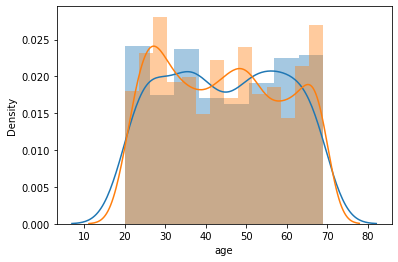

In [27]:
ax_1 = sns.distplot(full_data.query('premium == True').age)
ax_2 = sns.distplot(full_data.query('premium == False').age)
# посторим графики распределения возраста клиентов в 
# зависимости от типа клиента(премиум или нет)

In [28]:
success_number = logs.query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'success': 'count'}) \
    .sort_values(['success', 'client'], ascending=[False, True]) \
    .rename(columns={'success': 'success_number'})


In [29]:
success_number_client_count = success_number.groupby('success_number') \
    .agg({'client': 'count'}) \
    .rename(columns={'client': 'success_count_client'}) \
# посмотрим, сколько клиентов совершали успешных операций


In [30]:
success_number_client_count

,success_count_client
success_number,
1,2791
2,43
3,1
40,1
41,9


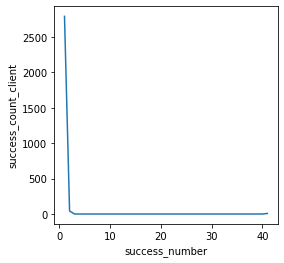

In [44]:
plt.figure(figsize=(4, 4))
axx = sns.lineplot(data=success_number_client_count, x='success_number', y='success_count_client')
# построим график распределения числа успешных операций

In [32]:
success_computer_by_age = full_data.query('success == True and platform == "computer"')
# отберем число успешных операций , сделанных на платформе computer

In [33]:
success_computer_by_age.head()

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
26,49675,False,48,True,computer,1585402108


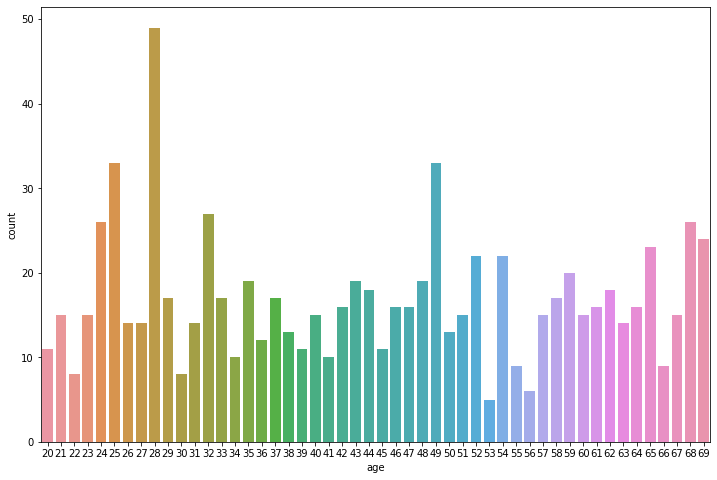

In [34]:
plt.figure(figsize=(12, 8))
sns.countplot(x='age' ,data=success_computer_by_age)
# построим график зависимости числа успешных операций от возраста и 
# посмотрим, клиенты какого возраста совершили наибольшее количество успешных операций